In [ ]:
#Part a and b - Preprocessing, Feature Engineering, creating ANNs and RF models, Ensemble Learning through Max Voting

import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files           #It is used incase pd.read_csv() gives an error
uploaded = files.upload()

ds = pd.read_csv("Dataset.txt")
dss = np.array(ds)
print(dss)
print(dss.shape)

[[0 'tcp' 'ftp_data' ... 0.0 'normal' 20]
 [0 'udp' 'other' ... 0.0 'normal' 15]
 [0 'tcp' 'private' ... 0.0 'neptune' 19]
 ...
 [0 'tcp' 'smtp' ... 0.0 'normal' 18]
 [0 'tcp' 'klogin' ... 0.0 'neptune' 20]
 [0 'tcp' 'ftp_data' ... 0.0 'normal' 21]]
(125973, 43)


In [ ]:
from google.colab import files        #It is used incase pd.read_csv() gives an error
uploaded = files.upload()

at = pd.read_csv("Attack_types.txt", sep=" ")      #columns are separated based on spaces instead of commas  
att = np.array(at)
print(att)
print(att.shape)

[['apache2' 'dos']
 ['back' 'dos']
 ['mailbomb' 'dos']
 ['processtable' 'dos']
 ['snmpgetattack' 'dos']
 ['teardrop' 'dos']
 ['smurf' 'dos']
 ['land' 'dos']
 ['neptune' 'dos']
 ['pod' 'dos']
 ['udpstorm' 'dos']
 ['ps' 'u2r']
 ['buffer_overflow' 'u2r']
 ['perl' 'u2r']
 ['rootkit' 'u2r']
 ['loadmodule' 'u2r']
 ['xterm' 'u2r']
 ['sqlattack' 'u2r']
 ['httptunnel' 'u2r']
 ['ftp_write' 'r2l']
 ['guess_passwd' 'r2l']
 ['snmpguess' 'r2l']
 ['imap' 'r2l']
 ['spy' 'r2l']
 ['warezclient' 'r2l']
 ['warezmaster' 'r2l']
 ['multihop' 'r2l']
 ['phf' 'r2l']
 ['imap' 'r2l']
 ['named' 'r2l']
 ['sendmail' 'r2l']
 ['xlock' 'r2l']
 ['xsnoop' 'r2l']
 ['worm' 'r2l']
 ['nmap' 'probe']
 ['ipsweep' 'probe']
 ['portsweep' 'probe']
 ['satan' 'probe']
 ['mscan' 'probe']
 ['saint' 'probe']
 ['worm' 'probe']]
(41, 2)


In [ ]:
for i in range(125972):                       #Pre-processing: attack_category for each record has been replaced with corresponding attack_type in Dataset.txt
  for z in range(41):
    if (dss[ i, 41] == att[ z, 0]):
        dss[ i, 41] = att[ z, 1]

print(dss[:1000,41])

['normal' 'normal' 'dos' 'normal' 'normal' 'dos' 'dos' 'dos' 'dos' 'dos'
 'dos' 'dos' 'normal' 'r2l' 'dos' 'dos' 'normal' 'probe' 'normal' 'normal'
 'dos' 'dos' 'normal' 'normal' 'dos' 'normal' 'dos' 'normal' 'normal'
 'normal' 'probe' 'dos' 'normal' 'probe' 'normal' 'normal' 'normal' 'dos'
 'normal' 'dos' 'dos' 'dos' 'normal' 'normal' 'normal' 'dos' 'dos'
 'normal' 'r2l' 'dos' 'normal' 'dos' 'dos' 'normal' 'normal' 'normal'
 'probe' 'dos' 'dos' 'normal' 'normal' 'dos' 'probe' 'normal' 'dos'
 'normal' 'probe' 'dos' 'dos' 'dos' 'normal' 'dos' 'normal' 'normal' 'dos'
 'normal' 'dos' 'normal' 'normal' 'dos' 'normal' 'dos' 'dos' 'probe'
 'normal' 'dos' 'normal' 'dos' 'dos' 'normal' 'normal' 'normal' 'normal'
 'dos' 'dos' 'normal' 'normal' 'normal' 'normal' 'dos' 'normal' 'normal'
 'normal' 'normal' 'dos' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'probe' 'dos' 'normal'
 'normal' 'normal' 'dos' 'dos' 'dos' 'normal' 'dos' 'normal' 'normal'
 'no

In [ ]:
labels = dss[:,41]
print(labels.shape)
print(labels)

(125973,)
['normal' 'normal' 'dos' ... 'normal' 'dos' 'normal']


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
lab = label_encoder.fit_transform(labels)
#labels = to_categorical(labels, num_classes=5, dtype="float32")
print(lab)
print(lab.shape)

[1 1 0 ... 1 0 1]
(125973,)


In [ ]:
from keras.utils import to_categorical

lab = to_categorical(lab)

In [ ]:
print(lab.shape)
print(lab)


(125973, 5)
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
dss = np.delete(dss, 41, 1)
print(dss.shape)

(125973, 42)


In [ ]:
dss

array([[0, 'tcp', 'ftp_data', ..., 0.05, 0.0, 20],
       [0, 'udp', 'other', ..., 0.0, 0.0, 15],
       [0, 'tcp', 'private', ..., 0.0, 0.0, 19],
       ...,
       [0, 'tcp', 'smtp', ..., 0.01, 0.0, 18],
       [0, 'tcp', 'klogin', ..., 0.0, 0.0, 20],
       [0, 'tcp', 'ftp_data', ..., 0.0, 0.0, 21]], dtype=object)

In [ ]:
dss[:,1] = label_encoder.fit_transform(dss[:,1])
dss[:,2] = label_encoder.fit_transform(dss[:,2])
dss[:,3] = label_encoder.fit_transform(dss[:,3])

In [ ]:
print(dss[:,1])
print(dss[:,2])
print(dss[:,3])

[1 2 1 ... 1 1 1]
[20 44 49 ... 54 30 20]
[9 9 5 ... 9 5 9]


In [ ]:
print(dss)

[[0 1 20 ... 0.05 0.0 20]
 [0 2 44 ... 0.0 0.0 15]
 [0 1 49 ... 0.0 0.0 19]
 ...
 [0 1 54 ... 0.01 0.0 18]
 [0 1 30 ... 0.0 0.0 20]
 [0 1 20 ... 0.0 0.0 21]]


In [ ]:
dss = preprocessing.normalize(dss)                   
print(dss)

[[0.00000000e+00 1.94221607e-03 3.88443214e-02 ... 9.71108035e-05
  0.00000000e+00 3.88443214e-02]
 [0.00000000e+00 6.71310432e-03 1.47688295e-01 ... 0.00000000e+00
  0.00000000e+00 5.03482824e-02]
 [0.00000000e+00 3.45737279e-03 1.69411267e-01 ... 0.00000000e+00
  0.00000000e+00 6.56900830e-02]
 ...
 [0.00000000e+00 4.38779331e-04 2.36940839e-02 ... 4.38779331e-06
  0.00000000e+00 7.89802797e-03]
 [0.00000000e+00 3.38605825e-03 1.01581747e-01 ... 0.00000000e+00
  0.00000000e+00 6.77211650e-02]
 [0.00000000e+00 3.24986914e-03 6.49973827e-02 ... 0.00000000e+00
  0.00000000e+00 6.82472519e-02]]


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(dss, lab, test_size=0.20)


In [ ]:
train_x=np.asarray(train_x).astype(np.float32)

train_y=np.asarray(train_y).astype(np.float32)

test_x=np.asarray(test_x).astype(np.float32)

test_y=np.asarray(test_y).astype(np.float32)

In [ ]:
print(train_x.shape)
print(train_x)


(100778, 42)
[[0.0000000e+00 4.7472604e-03 2.8483562e-02 ... 0.0000000e+00
  0.0000000e+00 4.2725343e-02]
 [0.0000000e+00 9.5042977e-03 5.7025790e-02 ... 0.0000000e+00
  0.0000000e+00 9.9795133e-02]
 [0.0000000e+00 0.0000000e+00 1.1260610e-01 ... 0.0000000e+00
  0.0000000e+00 1.2064939e-01]
 ...
 [2.4226535e-02 1.2113268e-03 2.3015209e-02 ... 1.2113268e-05
  7.2679606e-05 2.1803882e-02]
 [1.0875464e-04 1.8125775e-05 4.3501856e-04 ... 7.6128249e-06
  7.6128249e-06 2.1750928e-04]
 [0.0000000e+00 2.7828929e-03 2.7828930e-02 ... 0.0000000e+00
  0.0000000e+00 5.2874967e-02]]


In [ ]:
print(train_y.shape)
print(train_y)

(100778, 5)
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
model = Sequential()
model.add(Dense(33, input_dim=42, activation='relu'))
model.add(Dense(34, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(5,activation='softmax'))

model.compile(Adam(lr=0.01), loss = "categorical_crossentropy", metrics = ['accuracy'])

print(model.summary())

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 33)                1419      
_________________________________________________________________
dense_213 (Dense)            (None, 34)                1156      
_________________________________________________________________
dense_214 (Dense)            (None, 35)                1225      
_________________________________________________________________
dense_215 (Dense)            (None, 5)                 180       
Total params: 3,980
Trainable params: 3,980
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
checkpoint = ModelCheckpoint("best_model1.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', period=1)
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'auto')

history = model.fit(train_x, train_y, validation_split= 0.20, epochs = 5, verbose = 1, batch_size= 64, callbacks=[checkpoint, earlystopping])

Epoch 1/5
1260/1260 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.9249 - val_loss: 0.0625 - val_accuracy: 0.9839

Epoch 00001: loss improved from inf to 0.14621, saving model to best_model1.hdf5
Epoch 2/5
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0613 - accuracy: 0.9825 - val_loss: 0.0442 - val_accuracy: 0.9886

Epoch 00002: loss improved from 0.14621 to 0.05647, saving model to best_model1.hdf5
Epoch 3/5
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0464 - accuracy: 0.9878 - val_loss: 0.0418 - val_accuracy: 0.9888

Epoch 00003: loss improved from 0.05647 to 0.04763, saving model to best_model1.hdf5
Epoch 4/5
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0407 - accuracy: 0.9886 - val_loss: 0.0352 - val_accuracy: 0.9911

Epoch 00004: loss improved from 0.04763 to 0.04096, saving model to best_model1.hdf5
Epoch 5/5
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0355 - accu

In [ ]:
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04208092391490936
Test accuracy: 0.9875769019126892


In [ ]:
pred = model.predict(test_x)
print(pred)
prediction = np.argmax(pred, axis = 1)
label = np.argmax(test_y,axis = 1)


[[8.1373308e-10 9.9998021e-01 1.0524496e-07 1.1754995e-05 7.8520443e-06]
 [3.9034293e-03 9.8899835e-01 4.7863365e-04 6.1686612e-03 4.5081761e-04]
 [9.9753773e-01 3.2595322e-05 2.4296555e-03 3.0512570e-08 2.3162231e-08]
 ...
 [3.6760075e-06 2.0612248e-05 9.9997520e-01 4.4497577e-07 1.9206322e-08]
 [4.8754719e-05 5.7420507e-04 9.9935979e-01 1.5610043e-05 1.6496102e-06]
 [4.2877016e-07 9.9985802e-01 2.0204600e-06 4.8866328e-05 9.0617126e-05]]


In [ ]:
print(label[:1000])
print(prediction[:1000])

[1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 2 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1
 3 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 2 2 0 1 1 0 2 2 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 2 1 0 1 2 1 0 1 0 1 1 1 0 0 0 1 0 2 1 1 1
 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 2 1 2 1 0 1 1 1 2 1 1 1 2 0 2 0
 1 0 2 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 2 1 1
 0 1 1 0 1 1 1 3 1 1 1 1 1 0 1 0 0 1 0 2 1 1 2 1 1 1 1 0 1 1 1 1 0 2 1 1 1
 1 1 2 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 2 2 1 0 0 0 0 0 0 1 0 1 1 1 0 0 2
 1 0 0 1 1 2 1 0 0 1 1 1 2 1 1 1 0 1 0 1 2 0 2 2 0 1 2 2 1 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 2 2 0 1 1 1 1 1 1 1 0 2 2 1 1 0 0 1 1 1 1 0 1 0 2 0 1
 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 2 0 1 1 2 0 3 2 1 1 1 1 1 1 1 2 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 0 1 1 0 1 2 1 1 0 2 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 2 1 0 0 1 0 1
 1 1 1 1 2 0 2 3 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 2 1 1 0 0 0 0 0 0 1
 1 1 1 2 1 2 2 2 1 1 1 0 

In [ ]:
model2 = Sequential()
model2.add(Dense(31, input_dim=42, activation='sigmoid'))
model2.add(Dense(36, activation='sigmoid'))
model2.add(Dense(41, activation='relu'))
model2.add(Dense(5,activation='softmax'))

model2.compile(Adam(lr=0.01), loss = "categorical_crossentropy", metrics = ['accuracy'])

print(model2.summary())

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_216 (Dense)            (None, 31)                1333      
_________________________________________________________________
dense_217 (Dense)            (None, 36)                1152      
_________________________________________________________________
dense_218 (Dense)            (None, 41)                1517      
_________________________________________________________________
dense_219 (Dense)            (None, 5)                 210       
Total params: 4,212
Trainable params: 4,212
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', period=1)
earlystopping2 = EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'auto')

history2 = model2.fit(train_x, train_y, validation_split= 0.20, epochs = 10, verbose = 1, batch_size= 32, callbacks=[checkpoint2, earlystopping2])

Epoch 1/10
2520/2520 [==============================] - 6s 2ms/step - loss: 0.4032 - accuracy: 0.8625 - val_loss: 0.1566 - val_accuracy: 0.9590

Epoch 00001: loss improved from inf to 0.27980, saving model to best_model2.hdf5
Epoch 2/10
2520/2520 [==============================] - 5s 2ms/step - loss: 0.1285 - accuracy: 0.9611 - val_loss: 0.0960 - val_accuracy: 0.9687

Epoch 00002: loss improved from 0.27980 to 0.11631, saving model to best_model2.hdf5
Epoch 3/10
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0945 - accuracy: 0.9700 - val_loss: 0.0801 - val_accuracy: 0.9829

Epoch 00003: loss improved from 0.11631 to 0.09060, saving model to best_model2.hdf5
Epoch 4/10
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0799 - accuracy: 0.9740 - val_loss: 0.1033 - val_accuracy: 0.9593

Epoch 00004: loss improved from 0.09060 to 0.07780, saving model to best_model2.hdf5
Epoch 5/10
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0719 -

In [ ]:
score2 = model2.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.032669901847839355
Test accuracy: 0.9898392558097839


In [ ]:
pred2 = model2.predict(test_x)
print(pred2)
prediction2 = np.argmax(pred2, axis = 1)
label2 = np.argmax(test_y,axis = 1)

[[1.8722305e-12 9.9979430e-01 2.0576989e-04 1.9477495e-10 2.9345912e-09]
 [1.8060006e-02 9.7056985e-01 3.2476410e-03 8.1042657e-03 1.8232082e-05]
 [9.9990118e-01 2.5462981e-07 9.8566627e-05 1.4308502e-12 3.9961023e-22]
 ...
 [1.2460746e-21 5.6092013e-13 1.0000000e+00 5.0818561e-20 0.0000000e+00]
 [1.6369326e-16 2.0895680e-08 1.0000000e+00 7.1397601e-15 5.7398872e-24]
 [1.0985900e-11 9.9982148e-01 1.7849939e-04 5.1659291e-11 1.0011680e-09]]


In [ ]:
print(label2[:1000])
print(prediction2[:1000])

[1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 2 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1
 3 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 2 2 0 1 1 0 2 2 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 2 1 0 1 2 1 0 1 0 1 1 1 0 0 0 1 0 2 1 1 1
 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 2 1 2 1 0 1 1 1 2 1 1 1 2 0 2 0
 1 0 2 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 2 1 1
 0 1 1 0 1 1 1 3 1 1 1 1 1 0 1 0 0 1 0 2 1 1 2 1 1 1 1 0 1 1 1 1 0 2 1 1 1
 1 1 2 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 2 2 1 0 0 0 0 0 0 1 0 1 1 1 0 0 2
 1 0 0 1 1 2 1 0 0 1 1 1 2 1 1 1 0 1 0 1 2 0 2 2 0 1 2 2 1 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 2 2 0 1 1 1 1 1 1 1 0 2 2 1 1 0 0 1 1 1 1 0 1 0 2 0 1
 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 2 0 1 1 2 0 3 2 1 1 1 1 1 1 1 2 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 0 1 1 0 1 2 1 1 0 2 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 2 1 0 0 1 0 1
 1 1 1 1 2 0 2 3 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 2 1 1 0 0 0 0 0 0 1
 1 1 1 2 1 2 2 2 1 1 1 0 

In [ ]:
from keras.layers import LeakyReLU
model3 = Sequential()
model3.add(Dense(20, input_dim=42, activation='relu'))
model3.add(LeakyReLU(alpha=0.05))
model3.add(Dense(30, activation='relu'))
model3.add(LeakyReLU(alpha=0.05))
model3.add(Dense(40, activation='relu'))
model3.add(Dense(5,activation='softmax'))

model3.compile(Adam(lr=0.01), loss = "categorical_crossentropy", metrics = ['accuracy'])

print(model3.summary())

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 20)                860       
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_221 (Dense)            (None, 30)                630       
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 30)                0         
_________________________________________________________________
dense_222 (Dense)            (None, 40)                1240      
_________________________________________________________________
dense_223 (Dense)            (None, 5)                 205       
Total params: 2,935
Trainable params: 2,935
Non-trainable params: 0
___________________________________________________

In [ ]:
checkpoint3 = ModelCheckpoint("best_model3.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', period=1)
earlystopping3 = EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'auto')

history3 = model3.fit(train_x, train_y, validation_split= 0.20, epochs = 20, verbose = 1, batch_size= 32, callbacks=[checkpoint3, earlystopping3])

Epoch 1/20
2520/2520 [==============================] - 5s 2ms/step - loss: 0.2340 - accuracy: 0.9231 - val_loss: 0.0540 - val_accuracy: 0.9854

Epoch 00001: loss improved from inf to 0.13644, saving model to best_model3.hdf5
Epoch 2/20
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0690 - accuracy: 0.9811 - val_loss: 0.0965 - val_accuracy: 0.9763

Epoch 00002: loss improved from 0.13644 to 0.06142, saving model to best_model3.hdf5
Epoch 3/20
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0505 - accuracy: 0.9863 - val_loss: 0.0383 - val_accuracy: 0.9908

Epoch 00003: loss improved from 0.06142 to 0.05015, saving model to best_model3.hdf5
Epoch 4/20
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0424 - accuracy: 0.9885 - val_loss: 0.0315 - val_accuracy: 0.9917

Epoch 00004: loss improved from 0.05015 to 0.04289, saving model to best_model3.hdf5
Epoch 5/20
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0400 -

In [ ]:
score3 = model3.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.034841034561395645
Test accuracy: 0.9901964664459229


In [ ]:
pred3 = model3.predict(test_x)
print(pred3)
prediction3 = np.argmax(pred3, axis = 1)
label3 = np.argmax(test_y,axis = 1)

[[1.9851769e-09 9.9999976e-01 2.1027903e-07 3.9137844e-09 2.3634876e-14]
 [3.1549804e-02 9.6245879e-01 3.8812137e-03 2.1101732e-03 6.5864436e-10]
 [9.9999988e-01 1.3254788e-07 2.4209550e-09 9.1800029e-19 0.0000000e+00]
 ...
 [3.5855399e-11 3.2781273e-09 1.0000000e+00 1.0479756e-14 7.6586072e-33]
 [5.1397787e-08 2.5799181e-07 9.9999964e-01 1.0160672e-11 1.0860932e-24]
 [4.7979070e-06 9.9704689e-01 2.8748047e-03 7.3205163e-05 3.8253614e-07]]


In [ ]:
print(label3[:1000])
print(prediction3[:1000])

[1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 2 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1
 3 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 2 2 0 1 1 0 2 2 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 2 1 0 1 2 1 0 1 0 1 1 1 0 0 0 1 0 2 1 1 1
 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 2 1 2 1 0 1 1 1 2 1 1 1 2 0 2 0
 1 0 2 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 2 1 1
 0 1 1 0 1 1 1 3 1 1 1 1 1 0 1 0 0 1 0 2 1 1 2 1 1 1 1 0 1 1 1 1 0 2 1 1 1
 1 1 2 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 2 2 1 0 0 0 0 0 0 1 0 1 1 1 0 0 2
 1 0 0 1 1 2 1 0 0 1 1 1 2 1 1 1 0 1 0 1 2 0 2 2 0 1 2 2 1 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 2 2 0 1 1 1 1 1 1 1 0 2 2 1 1 0 0 1 1 1 1 0 1 0 2 0 1
 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 2 0 1 1 2 0 3 2 1 1 1 1 1 1 1 2 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 0 1 1 0 1 2 1 1 0 2 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 2 1 0 0 1 0 1
 1 1 1 1 2 0 2 3 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 2 1 1 0 0 0 0 0 0 1
 1 1 1 2 1 2 2 2 1 1 1 0 

In [ ]:
from sklearn.ensemble import RandomForestClassifier    #Bonus done using RandomForest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(train_x,train_y)
pred4 = clf.predict(test_x)

from sklearn import metrics
score4 = metrics.accuracy_score(test_y, pred4)
print("Accuracy:", score4)

Accuracy: 0.998809287557055


In [ ]:
print(pred4)
prediction4 = np.argmax(pred4, axis = 1)
label4 = np.argmax(test_y,axis = 1)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
print(label4[:1000])
print(prediction4[:1000])

[1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 2 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1
 3 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 2 2 0 1 1 0 2 2 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 2 1 0 1 2 1 0 1 0 1 1 1 0 0 0 1 0 2 1 1 1
 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 2 1 2 1 0 1 1 1 2 1 1 1 2 0 2 0
 1 0 2 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 2 1 1
 0 1 1 0 1 1 1 3 1 1 1 1 1 0 1 0 0 1 0 2 1 1 2 1 1 1 1 0 1 1 1 1 0 2 1 1 1
 1 1 2 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 2 2 1 0 0 0 0 0 0 1 0 1 1 1 0 0 2
 1 0 0 1 1 2 1 0 0 1 1 1 2 1 1 1 0 1 0 1 2 0 2 2 0 1 2 2 1 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 2 2 0 1 1 1 1 1 1 1 0 2 2 1 1 0 0 1 1 1 1 0 1 0 2 0 1
 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 2 0 1 1 2 0 3 2 1 1 1 1 1 1 1 2 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 0 1 1 0 1 2 1 1 0 2 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 2 1 0 0 1 0 1
 1 1 1 1 2 0 2 3 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 2 1 1 0 0 0 0 0 0 1
 1 1 1 2 1 2 2 2 1 1 1 0 

In [ ]:
print(prediction[0])
print(prediction2[0])
print(prediction3[0])
print(prediction4[0])

1
1
1
1


In [ ]:
print(test_y.shape)                            #Ensembling through voting
result = [0] * test_y.shape[0]
for i in range(test_y.shape[0]):
   
   for x in range(5):
       arr = [0] * 5
       arr[prediction[i]]+=1
       arr[prediction2[i]]+=1
       arr[prediction3[i]]+=1
       arr[prediction4[i]]+=1

       result[i]  = np.argmax(arr)
     
   #print(arr)
   
   #print(result)

print(result)
data_t =np.argmax(test_y,axis = 1)
print(data_t)

(25195, 5)
[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0

In [ ]:
similar = 0
for i in range(test_y.shape[0]):
  if (result[i] == data_t[i]):
    similar += 1

accuracy = similar/test_y.shape[0]
print(accuracy)

0.9934510815638024


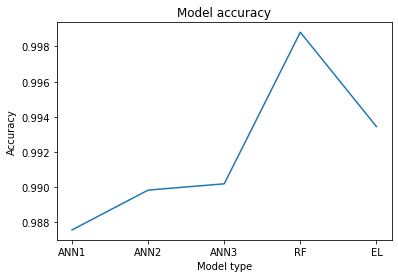

In [ ]:
plt.plot(['ANN1', 'ANN2', 'ANN3', 'RF', 'EL'], [score[1], score2[1], score3[1], score4, accuracy])
#plt.plot([1, 2, 3, 3, 5])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model type')
#plt.legend(['Model Type', 'Accuracy'], loc='upper left')
plt.show()

In [ ]:
# Clustering through K-means followed by training (ANNs) and Ensembling

cl = np.array(ds)
print(cl)

[[0 'tcp' 'ftp_data' ... 0.0 'normal' 20]
 [0 'udp' 'other' ... 0.0 'normal' 15]
 [0 'tcp' 'private' ... 0.0 'neptune' 19]
 ...
 [0 'tcp' 'smtp' ... 0.0 'normal' 18]
 [0 'tcp' 'klogin' ... 0.0 'neptune' 20]
 [0 'tcp' 'ftp_data' ... 0.0 'normal' 21]]


In [ ]:
cl = np.delete(cl, 41, 1)
print(cl.shape)
print(cl)

(125973, 42)
[[0 'tcp' 'ftp_data' ... 0.05 0.0 20]
 [0 'udp' 'other' ... 0.0 0.0 15]
 [0 'tcp' 'private' ... 0.0 0.0 19]
 ...
 [0 'tcp' 'smtp' ... 0.01 0.0 18]
 [0 'tcp' 'klogin' ... 0.0 0.0 20]
 [0 'tcp' 'ftp_data' ... 0.0 0.0 21]]


In [ ]:
from sklearn.cluster import KMeans #, SpectralClustering
from sklearn.preprocessing import StandardScaler

cl[:,1] = label_encoder.fit_transform(cl[:,1])
cl[:,2] = label_encoder.fit_transform(cl[:,2])
cl[:,3] = label_encoder.fit_transform(cl[:,3])

In [ ]:
print(cl[:,:4])

[[0 1 20 9]
 [0 2 44 9]
 [0 1 49 5]
 ...
 [0 1 54 9]
 [0 1 30 5]
 [0 1 20 9]]


In [ ]:
cll = preprocessing.normalize(cl)

In [ ]:
print(cll)

[[0.00000000e+00 1.94221607e-03 3.88443214e-02 ... 9.71108035e-05
  0.00000000e+00 3.88443214e-02]
 [0.00000000e+00 6.71310432e-03 1.47688295e-01 ... 0.00000000e+00
  0.00000000e+00 5.03482824e-02]
 [0.00000000e+00 3.45737279e-03 1.69411267e-01 ... 0.00000000e+00
  0.00000000e+00 6.56900830e-02]
 ...
 [0.00000000e+00 4.38779331e-04 2.36940839e-02 ... 4.38779331e-06
  0.00000000e+00 7.89802797e-03]
 [0.00000000e+00 3.38605825e-03 1.01581747e-01 ... 0.00000000e+00
  0.00000000e+00 6.77211650e-02]
 [0.00000000e+00 3.24986914e-03 6.49973827e-02 ... 0.00000000e+00
  0.00000000e+00 6.82472519e-02]]


In [ ]:
#X_std = StandardScaler().fit_transform(cll)
kmeans = KMeans(n_clusters=5, max_iter=5).fit(cll)
label = kmeans.predict(cll)
centroids = kmeans.cluster_centers_

In [ ]:
print(label[:1000])

[2 1 1 0 0 1 1 1 1 1 1 1 0 2 1 1 0 3 0 0 1 1 0 4 1 0 1 0 0 0 3 1 0 1 3 0 3
 1 0 1 1 1 2 4 0 1 1 0 2 1 0 1 1 0 3 3 3 1 1 3 2 1 1 0 1 2 1 1 1 1 0 1 3 3
 1 3 1 0 0 1 0 1 1 3 0 1 0 1 1 4 0 0 3 1 1 2 0 0 4 1 0 0 3 0 3 0 0 0 0 3 3
 2 3 0 0 4 1 3 0 0 1 1 1 3 1 1 3 2 3 0 1 1 2 0 1 1 1 0 2 1 0 1 1 0 0 0 1 0
 2 1 1 0 1 1 1 3 2 1 3 1 0 3 3 2 1 4 1 0 2 0 1 0 2 1 1 1 3 1 1 1 3 2 1 2 1
 1 1 1 2 0 4 0 1 1 0 0 2 0 1 0 0 1 0 2 2 2 1 0 0 1 1 2 1 0 1 1 0 0 0 2 0 1
 2 1 3 3 0 1 2 0 2 0 1 1 3 1 1 1 1 0 0 3 1 1 1 0 1 3 1 0 3 0 0 4 1 2 0 0 1
 0 1 2 0 1 0 0 0 2 3 1 0 1 3 3 0 0 1 1 0 0 0 1 3 0 1 3 1 1 0 4 1 1 1 0 0 0
 0 3 1 1 2 1 1 2 0 3 3 0 1 2 1 0 1 1 0 2 3 1 3 1 2 1 1 1 2 1 0 0 3 1 1 1 3
 0 1 0 2 0 1 1 0 1 3 0 1 1 1 3 1 1 1 0 1 0 1 0 1 0 1 2 2 0 1 3 0 3 2 0 1 1
 0 0 0 1 0 1 3 0 3 1 3 1 3 1 1 0 1 3 0 2 0 1 1 1 1 1 4 1 3 3 0 1 2 3 3 0 0
 3 1 3 0 1 0 0 1 3 3 1 1 1 0 1 1 1 1 0 2 3 0 1 2 2 1 0 3 0 0 2 0 0 1 0 1 1
 2 0 2 1 1 0 3 3 1 1 1 0 1 0 1 1 4 0 1 2 0 1 2 1 3 2 1 1 1 0 1 2 0 1 3 0 1
 1 1 0 1 0 0 1 1 4 1 3 3 

In [ ]:
print(centroids)

[[ 3.09571067e-03  9.06784027e-04  2.05226901e-02  7.47197240e-03
   1.84299260e-01  9.23608065e-01 -6.77626358e-19 -1.12621501e-17
   8.32191855e-08  2.38515317e-04  1.22681175e-05  7.01780982e-04
   1.63071631e-05  7.26938365e-07  8.78863260e-08  1.15573243e-05
   3.09029167e-06  2.44295490e-07  2.41243632e-06  0.00000000e+00
   3.62325684e-09  1.77872958e-05  6.97553820e-03  9.19324425e-03
   6.12779112e-06  6.76415769e-06  1.03129845e-05  1.09956117e-05
   8.23046219e-04  1.91248707e-05  8.38065754e-05  9.54983865e-02
   1.60049421e-01  7.22074441e-04  3.13609017e-05  6.91477514e-05
   4.52853901e-05  3.64946855e-06  3.83047492e-06  2.00035557e-05
   1.78153341e-05  1.70727089e-02]
 [ 5.02283520e-04  3.67590113e-03  1.36762933e-01  1.65495693e-02
   1.51290964e-02  3.16504374e-03  1.57960370e-06  1.94894540e-04
  -2.60859678e-20  2.26151919e-06  5.89698374e-08  5.38876676e-05
   5.13834341e-07  2.65756587e-19  1.95677846e-20  7.62313896e-07
   6.10076348e-08 -1.52307112e-19  6.7974

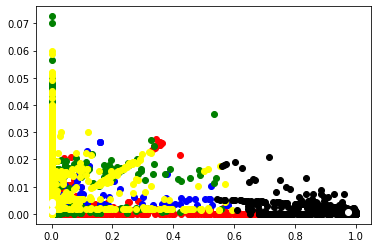

In [ ]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = cll[label == 0]
filtered_label1 = cll[label == 1]
filtered_label2 = cll[label == 2]
filtered_label3 = cll[label == 3]
filtered_label4 = cll[label == 4]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], c='red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1], c='blue')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1], c='green')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1], c='yellow')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1],c='black')
plt.scatter(centroids[:,0] , centroids[:,1],c='white')
plt.show()

In [ ]:
#import matplotlib.pyplot as plt           
#ig, ax = plt.subplots(figsize=(10,6))
#plt.scatter(X_std[kmeans.labels_ ==0,0], X_std[kmeans.labels_ ==0,1], c='green' , label = 'cluster 1')
#plt.scatter(X_std[kmeans.labels_ ==1,0], X_std[kmeans.labels_ ==1,1], c='blue' , label = 'cluster 2')
#plt.scatter(X_std[kmeans.labels_ ==2,0], X_std[kmeans.labels_ ==2,1], c='black' , label = 'cluster 3')
#plt.scatter(X_std[kmeans.labels_ ==3,0], X_std[kmeans.labels_ ==3,1], c='white' , label = 'cluster 4')
#plt.scatter(X_std[kmeans.labels_ ==4,0], X_std[kmeans.labels_ ==4,1], c='yellow' , label = 'cluster 5')

In [ ]:
label = label_encoder.fit_transform(label)
print(label)
print(label.shape)

[2 1 1 ... 2 1 1]
(125973,)


In [ ]:
label = to_categorical(label)

In [ ]:
print(label.shape)
print(label)

(125973, 5)
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(cll, label, test_size=0.20)

In [ ]:
print(y_train)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
x_train=np.asarray(x_train).astype(np.float32)

y_train=np.asarray(y_train).astype(np.float32)

x_test=np.asarray(x_test).astype(np.float32)

y_test=np.asarray(y_test).astype(np.float32)

In [ ]:
model = Sequential()
model.add(Dense(33, input_dim=42, activation='relu'))
model.add(Dense(34, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(5,activation='softmax'))

model.compile(Adam(lr=0.01), loss = "categorical_crossentropy", metrics = ['accuracy'])

print(model.summary())

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_224 (Dense)            (None, 33)                1419      
_________________________________________________________________
dense_225 (Dense)            (None, 34)                1156      
_________________________________________________________________
dense_226 (Dense)            (None, 35)                1225      
_________________________________________________________________
dense_227 (Dense)            (None, 5)                 180       
Total params: 3,980
Trainable params: 3,980
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
checkpoint = ModelCheckpoint("best_model4.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', period=1)
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'auto')

history = model.fit(x_train, y_train, validation_split= 0.20, epochs = 5, verbose = 1, batch_size= 64, callbacks=[checkpoint, earlystopping])

Epoch 1/5
1260/1260 [==============================] - 3s 2ms/step - loss: 0.0975 - accuracy: 0.9656 - val_loss: 0.0150 - val_accuracy: 0.9948

Epoch 00001: loss improved from inf to 0.03834, saving model to best_model4.hdf5
Epoch 2/5
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0228 - accuracy: 0.9916 - val_loss: 0.0125 - val_accuracy: 0.9950

Epoch 00002: loss improved from 0.03834 to 0.02037, saving model to best_model4.hdf5
Epoch 3/5
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0177 - accuracy: 0.9933 - val_loss: 0.0096 - val_accuracy: 0.9963

Epoch 00003: loss improved from 0.02037 to 0.01599, saving model to best_model4.hdf5
Epoch 4/5
1260/1260 [==============================] - 2s 2ms/step - loss: 0.0140 - accuracy: 0.9949 - val_loss: 0.0171 - val_accuracy: 0.9938

Epoch 00004: loss improved from 0.01599 to 0.01540, saving model to best_model4.hdf5
Epoch 5/5
1260/1260 [==============================] - 3s 2ms/step - loss: 0.0187 - accu

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025094158947467804
Test accuracy: 0.99130779504776


In [ ]:
pred = model.predict(x_test)
print(pred)
prediction = np.argmax(pred, axis = 1)
label = np.argmax(y_test,axis = 1)

[[6.0279276e-02 1.7082744e-04 5.8640065e-03 9.3364471e-01 4.1192739e-05]
 [5.0732599e-11 1.5776048e-19 1.0000000e+00 1.6491365e-15 1.0668090e-20]
 [9.1816852e-19 1.0000000e+00 6.4266246e-14 1.7843649e-17 1.6999469e-24]
 ...
 [2.7361579e-13 3.4422911e-23 1.0000000e+00 4.8009935e-19 6.2288753e-25]
 [9.9999964e-01 2.4571497e-07 6.9880784e-08 4.2726862e-09 2.6093150e-10]
 [4.4703799e-07 5.3541392e-08 1.1071547e-06 9.9999845e-01 2.8271507e-14]]


In [ ]:
print(label[:1000])
print(prediction[:1000])

[0 2 1 1 2 0 2 0 3 0 0 2 3 3 0 0 2 1 3 1 2 1 1 1 1 1 1 1 2 0 1 0 0 2 0 1 1
 1 0 0 4 0 3 0 2 0 1 3 3 3 3 1 3 3 1 0 4 1 1 3 0 3 3 0 0 2 4 3 2 3 1 1 2 2
 0 4 0 1 2 1 1 0 3 1 0 1 0 0 0 2 1 2 3 3 3 1 3 0 3 0 3 2 4 1 0 0 0 3 3 1 3
 3 2 1 2 1 1 3 1 3 0 2 3 1 1 0 0 3 1 0 0 1 1 0 1 1 1 1 1 1 3 1 1 0 1 0 2 0
 0 3 0 1 3 0 1 2 1 1 1 3 1 1 3 1 0 2 0 1 1 0 0 1 3 3 1 3 2 1 1 3 0 1 2 1 0
 4 1 3 1 1 1 0 3 1 1 1 2 1 0 1 2 2 0 1 0 1 1 1 1 0 1 1 2 0 1 3 0 3 1 3 1 2
 1 0 0 1 0 3 1 0 0 1 3 0 0 0 1 1 1 1 2 1 2 2 1 1 1 1 2 0 1 1 0 1 0 2 3 0 1
 1 3 0 2 1 1 2 0 1 0 1 0 1 1 0 0 0 2 3 3 0 0 1 1 0 1 4 1 1 3 3 0 3 1 1 3 1
 1 0 1 1 1 1 1 3 1 3 1 1 1 1 0 3 2 2 0 0 3 2 0 1 0 1 1 1 0 0 0 0 0 0 1 1 3
 1 1 2 0 0 3 0 1 0 0 0 1 0 1 0 0 1 0 2 1 1 1 2 0 1 1 1 2 1 2 1 1 1 4 0 3 1
 2 4 0 1 1 3 0 0 1 1 0 2 4 1 1 2 2 2 3 3 1 3 2 1 3 3 1 3 1 1 1 3 0 0 1 0 1
 3 2 1 0 3 1 2 1 2 2 0 2 0 1 0 2 0 0 1 1 4 2 0 1 1 1 1 0 3 2 2 3 3 0 3 1 1
 1 3 0 3 1 1 2 1 1 1 4 0 2 3 3 3 0 0 0 3 3 2 1 2 0 1 1 0 1 0 3 0 1 1 1 3 0
 0 1 0 1 2 0 3 1 1 1 2 1 

In [ ]:
model2 = Sequential()
model2.add(Dense(31, input_dim=42, activation='sigmoid'))
model2.add(Dense(36, activation='sigmoid'))
model2.add(Dense(41, activation='relu'))
model2.add(Dense(5,activation='softmax'))

model2.compile(Adam(lr=0.01), loss = "categorical_crossentropy", metrics = ['accuracy'])

print(model2.summary())

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 31)                1333      
_________________________________________________________________
dense_229 (Dense)            (None, 36)                1152      
_________________________________________________________________
dense_230 (Dense)            (None, 41)                1517      
_________________________________________________________________
dense_231 (Dense)            (None, 5)                 210       
Total params: 4,212
Trainable params: 4,212
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
checkpoint2 = ModelCheckpoint("best_model5.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', period=1)
earlystopping2 = EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'auto')

history2 = model2.fit(x_train, y_train, validation_split= 0.20, epochs = 10, verbose = 1, batch_size= 32, callbacks=[checkpoint2, earlystopping2])

Epoch 1/10
2520/2520 [==============================] - 5s 2ms/step - loss: 0.2155 - accuracy: 0.9143 - val_loss: 0.0205 - val_accuracy: 0.9899

Epoch 00001: loss improved from inf to 0.07114, saving model to best_model5.hdf5
Epoch 2/10
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0219 - accuracy: 0.9917 - val_loss: 0.0125 - val_accuracy: 0.9953

Epoch 00002: loss improved from 0.07114 to 0.02004, saving model to best_model5.hdf5
Epoch 3/10
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0168 - accuracy: 0.9935 - val_loss: 0.0123 - val_accuracy: 0.9950

Epoch 00003: loss improved from 0.02004 to 0.01861, saving model to best_model5.hdf5
Epoch 4/10
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0148 - accuracy: 0.9941 - val_loss: 0.0124 - val_accuracy: 0.9953

Epoch 00004: loss improved from 0.01861 to 0.01582, saving model to best_model5.hdf5
Epoch 5/10
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0127 -

In [ ]:
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.013071217574179173
Test accuracy: 0.9950783848762512


In [ ]:
pred2 = model2.predict(x_test)
print(pred2)
prediction2 = np.argmax(pred2, axis = 1)
label2 = np.argmax(y_test,axis = 1)

[[9.7255152e-01 2.2865829e-04 4.9767835e-04 2.6721694e-02 4.4022795e-07]
 [3.7092260e-08 2.7779903e-09 1.0000000e+00 1.1233241e-09 2.4303178e-14]
 [2.8484395e-08 9.9999952e-01 3.5185223e-11 4.3125016e-07 1.6048246e-15]
 ...
 [9.1311545e-09 9.9860598e-10 1.0000000e+00 1.8879023e-10 2.0875769e-15]
 [1.0000000e+00 5.0136169e-08 6.1074452e-09 2.3848905e-09 1.8007909e-12]
 [4.0679254e-08 1.5066612e-09 2.0151195e-10 1.0000000e+00 1.4798121e-21]]


In [ ]:
print(label2[:1000])
print(prediction2[:1000])

[0 2 1 1 2 0 2 0 3 0 0 2 3 3 0 0 2 1 3 1 2 1 1 1 1 1 1 1 2 0 1 0 0 2 0 1 1
 1 0 0 4 0 3 0 2 0 1 3 3 3 3 1 3 3 1 0 4 1 1 3 0 3 3 0 0 2 4 3 2 3 1 1 2 2
 0 4 0 1 2 1 1 0 3 1 0 1 0 0 0 2 1 2 3 3 3 1 3 0 3 0 3 2 4 1 0 0 0 3 3 1 3
 3 2 1 2 1 1 3 1 3 0 2 3 1 1 0 0 3 1 0 0 1 1 0 1 1 1 1 1 1 3 1 1 0 1 0 2 0
 0 3 0 1 3 0 1 2 1 1 1 3 1 1 3 1 0 2 0 1 1 0 0 1 3 3 1 3 2 1 1 3 0 1 2 1 0
 4 1 3 1 1 1 0 3 1 1 1 2 1 0 1 2 2 0 1 0 1 1 1 1 0 1 1 2 0 1 3 0 3 1 3 1 2
 1 0 0 1 0 3 1 0 0 1 3 0 0 0 1 1 1 1 2 1 2 2 1 1 1 1 2 0 1 1 0 1 0 2 3 0 1
 1 3 0 2 1 1 2 0 1 0 1 0 1 1 0 0 0 2 3 3 0 0 1 1 0 1 4 1 1 3 3 0 3 1 1 3 1
 1 0 1 1 1 1 1 3 1 3 1 1 1 1 0 3 2 2 0 0 3 2 0 1 0 1 1 1 0 0 0 0 0 0 1 1 3
 1 1 2 0 0 3 0 1 0 0 0 1 0 1 0 0 1 0 2 1 1 1 2 0 1 1 1 2 1 2 1 1 1 4 0 3 1
 2 4 0 1 1 3 0 0 1 1 0 2 4 1 1 2 2 2 3 3 1 3 2 1 3 3 1 3 1 1 1 3 0 0 1 0 1
 3 2 1 0 3 1 2 1 2 2 0 2 0 1 0 2 0 0 1 1 4 2 0 1 1 1 1 0 3 2 2 3 3 0 3 1 1
 1 3 0 3 1 1 2 1 1 1 4 0 2 3 3 3 0 0 0 3 3 2 1 2 0 1 1 0 1 0 3 0 1 1 1 3 0
 0 1 0 1 2 0 3 1 1 1 2 1 

In [ ]:
model3 = Sequential()
model3.add(Dense(20, input_dim=42, activation='relu'))
model3.add(LeakyReLU(alpha=0.05))
model3.add(Dense(30, activation='relu'))
model3.add(LeakyReLU(alpha=0.05))
model3.add(Dense(40, activation='relu'))
model3.add(Dense(5,activation='softmax'))

model3.compile(Adam(lr=0.01), loss = "categorical_crossentropy", metrics = ['accuracy'])

print(model3.summary())

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_232 (Dense)            (None, 20)                860       
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_233 (Dense)            (None, 30)                630       
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 30)                0         
_________________________________________________________________
dense_234 (Dense)            (None, 40)                1240      
_________________________________________________________________
dense_235 (Dense)            (None, 5)                 205       
Total params: 2,935
Trainable params: 2,935
Non-trainable params: 0
___________________________________________________

In [ ]:
checkpoint3 = ModelCheckpoint("best_model6.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', period=1)
earlystopping3 = EarlyStopping(monitor = 'val_loss', patience = 3, mode = 'auto')

history3 = model3.fit(x_train, y_train, validation_split= 0.20, epochs = 20, verbose = 1, batch_size= 32, callbacks=[checkpoint3, earlystopping3])

Epoch 1/20
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0873 - accuracy: 0.9689 - val_loss: 0.0223 - val_accuracy: 0.9914

Epoch 00001: loss improved from inf to 0.03883, saving model to best_model6.hdf5
Epoch 2/20
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0232 - accuracy: 0.9916 - val_loss: 0.0187 - val_accuracy: 0.9950

Epoch 00002: loss improved from 0.03883 to 0.02117, saving model to best_model6.hdf5
Epoch 3/20
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0202 - accuracy: 0.9928 - val_loss: 0.0231 - val_accuracy: 0.9917

Epoch 00003: loss improved from 0.02117 to 0.01951, saving model to best_model6.hdf5
Epoch 4/20
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0170 - accuracy: 0.9937 - val_loss: 0.0131 - val_accuracy: 0.9938

Epoch 00004: loss improved from 0.01951 to 0.01700, saving model to best_model6.hdf5
Epoch 5/20
2520/2520 [==============================] - 5s 2ms/step - loss: 0.0169 -

In [ ]:
score3 = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.013535095378756523
Test accuracy: 0.9937289357185364


In [ ]:
pred3 = model3.predict(x_test)
print(pred3)
prediction3 = np.argmax(pred3, axis = 1)
label3 = np.argmax(y_test,axis = 1)

[[8.5224915e-01 2.7415942e-04 3.4416134e-03 1.4331499e-01 7.2006759e-04]
 [6.7575331e-19 4.7167023e-14 1.0000000e+00 1.0888216e-12 5.4108588e-23]
 [1.5933051e-27 1.0000000e+00 4.0855893e-17 1.3950072e-18 0.0000000e+00]
 ...
 [6.6469903e-32 5.2174629e-24 1.0000000e+00 8.5339059e-22 0.0000000e+00]
 [1.0000000e+00 3.7220457e-16 3.3255245e-12 1.0024518e-08 6.9224886e-17]
 [2.7841597e-08 1.9525394e-06 3.1016287e-07 9.9999774e-01 5.9069714e-13]]


In [ ]:
print(label3[:1000])
print(prediction3[:1000])

[0 2 1 1 2 0 2 0 3 0 0 2 3 3 0 0 2 1 3 1 2 1 1 1 1 1 1 1 2 0 1 0 0 2 0 1 1
 1 0 0 4 0 3 0 2 0 1 3 3 3 3 1 3 3 1 0 4 1 1 3 0 3 3 0 0 2 4 3 2 3 1 1 2 2
 0 4 0 1 2 1 1 0 3 1 0 1 0 0 0 2 1 2 3 3 3 1 3 0 3 0 3 2 4 1 0 0 0 3 3 1 3
 3 2 1 2 1 1 3 1 3 0 2 3 1 1 0 0 3 1 0 0 1 1 0 1 1 1 1 1 1 3 1 1 0 1 0 2 0
 0 3 0 1 3 0 1 2 1 1 1 3 1 1 3 1 0 2 0 1 1 0 0 1 3 3 1 3 2 1 1 3 0 1 2 1 0
 4 1 3 1 1 1 0 3 1 1 1 2 1 0 1 2 2 0 1 0 1 1 1 1 0 1 1 2 0 1 3 0 3 1 3 1 2
 1 0 0 1 0 3 1 0 0 1 3 0 0 0 1 1 1 1 2 1 2 2 1 1 1 1 2 0 1 1 0 1 0 2 3 0 1
 1 3 0 2 1 1 2 0 1 0 1 0 1 1 0 0 0 2 3 3 0 0 1 1 0 1 4 1 1 3 3 0 3 1 1 3 1
 1 0 1 1 1 1 1 3 1 3 1 1 1 1 0 3 2 2 0 0 3 2 0 1 0 1 1 1 0 0 0 0 0 0 1 1 3
 1 1 2 0 0 3 0 1 0 0 0 1 0 1 0 0 1 0 2 1 1 1 2 0 1 1 1 2 1 2 1 1 1 4 0 3 1
 2 4 0 1 1 3 0 0 1 1 0 2 4 1 1 2 2 2 3 3 1 3 2 1 3 3 1 3 1 1 1 3 0 0 1 0 1
 3 2 1 0 3 1 2 1 2 2 0 2 0 1 0 2 0 0 1 1 4 2 0 1 1 1 1 0 3 2 2 3 3 0 3 1 1
 1 3 0 3 1 1 2 1 1 1 4 0 2 3 3 3 0 0 0 3 3 2 1 2 0 1 1 0 1 0 3 0 1 1 1 3 0
 0 1 0 1 2 0 3 1 1 1 2 1 

In [ ]:
print(pred[0])
print(pred2[0])
print(pred3[0])

[6.0279276e-02 1.7082744e-04 5.8640065e-03 9.3364471e-01 4.1192739e-05]
[9.7255152e-01 2.2865829e-04 4.9767835e-04 2.6721694e-02 4.4022795e-07]
[8.5224915e-01 2.7415942e-04 3.4416134e-03 1.4331499e-01 7.2006759e-04]


In [ ]:
print(y_test.shape)
result = [0] * y_test.shape[0]
for i in range(y_test.shape[0]):
  sum = 0
  sum = pred[i] + pred2[i] + pred3[i] 
  #print(sum)
  sum = np.array(sum)
  result[i] = np.argmax(sum)
  #print(result)

print(result)
data_t =np.argmax(y_test,axis = 1)
print(data_t)

(25195, 5)
[0, 2, 1, 1, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 0, 0, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 4, 0, 3, 0, 2, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 0, 4, 1, 1, 3, 0, 3, 3, 0, 0, 2, 4, 3, 2, 3, 1, 1, 2, 2, 0, 4, 0, 1, 2, 1, 1, 0, 3, 1, 0, 1, 0, 0, 0, 2, 1, 2, 3, 3, 3, 1, 3, 0, 3, 0, 3, 2, 4, 1, 0, 0, 0, 3, 3, 1, 3, 3, 1, 1, 2, 1, 1, 3, 1, 3, 0, 2, 3, 1, 1, 0, 0, 3, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 3, 0, 1, 3, 0, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 0, 2, 0, 1, 1, 0, 0, 1, 3, 3, 1, 3, 2, 1, 1, 3, 0, 1, 2, 1, 0, 4, 1, 3, 1, 1, 1, 0, 3, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 3, 0, 3, 1, 3, 1, 2, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 3, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 3, 0, 1, 1, 3, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 3, 3, 0, 0, 1, 1, 0, 1, 4, 1, 1, 3, 3, 0, 3, 1, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 0, 3, 2, 2, 0, 0, 3, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0

In [ ]:
similar = 0
for i in range(y_test.shape[0]):
  if (result[i] == data_t[i]):
    similar += 1

accuracy = similar/test_y.shape[0]
print(accuracy)

0.9949990077396309


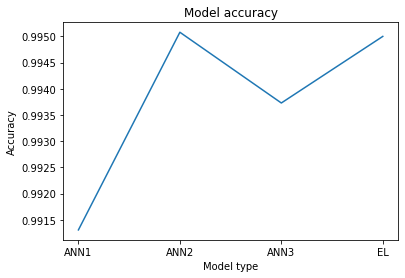

In [ ]:
plt.plot(['ANN1', 'ANN2', 'ANN3', 'EL'], [score[1], score2[1], score3[1], accuracy])
#plt.plot([1, 2, 3, 3, 5])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model type')
#plt.legend(['Model Type', 'Accuracy'], loc='upper left')
plt.show()